# Лабораторна робота2

## Завдання

1. Поглиблено вивчити функцію [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html?highlight=make_regression#sklearn.datasets.make_regression).
2. Згенерувати набір даних за допомогою означеної функції, з використанням якнайбільшої кількості параметрів. 
3. Розмірність набору даних прийняти у вигляді (100000х(30-n)), де n - номер за списком.
4. Здійснити моделювання згенерованого набору даних та візуалізацію результатів.
5. Результати оформити у вигляді файлів:
- набір даних у форматі .csv
- код для формування набору даних у форматі .ipynb
- код для моделювання та візуалізації у форматі .ipynb
6. Результати викласти у репозиторії GitHub (папка Lab2).
7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)


#### 1. Поглиблено вивчити функцію make_regression

In [3]:
from sklearn.datasets import make_regression

#### 2. Згенерувати набір даних за допомогою означеної функції, з використанням якнайбільшої кількості параметрів.
#### 3. Розмірність набору даних прийняти у вигляді (100000х(30-n)), де n - номер за списком.

In [4]:
seed = 42
n = 13

In [12]:
X, y = make_regression(n_samples=100000,
                       n_features=30-n,
                       n_informative=5,
                       n_targets=1,
                       bias=3,
                       tail_strength=0.2,
                       noise=1,
                       random_state=seed)

In [13]:
y = y.reshape(-1, 1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [18]:
# Data normalization
X_train_norm = X_scaler.fit_transform(X_train)
y_train_norm = y_scaler.fit_transform(y_train)

#### 4. Здійснити моделювання згенерованого набору даних та візуалізацію результатів. 

In [33]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
tf.random.set_seed(seed)

In [101]:
batch_size = 32

In [119]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=(batch_size, X_train.shape[1])),
    tf.keras.layers.Dense(1)
])

In [120]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MSE,
              metrics=['MSE'])

history = model.fit(X_train_norm,
                    y_train_norm,
                    validation_split=0.1,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=2)

Epoch 1/10
1885/1885 - 2s - loss: 0.0250 - MSE: 0.0250 - val_loss: 0.0109 - val_MSE: 0.0109
Epoch 2/10
1885/1885 - 1s - loss: 0.0047 - MSE: 0.0047 - val_loss: 2.9645e-04 - val_MSE: 2.9645e-04
Epoch 3/10
1885/1885 - 1s - loss: 8.4661e-05 - MSE: 8.4661e-05 - val_loss: 1.4092e-05 - val_MSE: 1.4092e-05
Epoch 4/10
1885/1885 - 1s - loss: 5.5652e-06 - MSE: 5.5652e-06 - val_loss: 3.2790e-06 - val_MSE: 3.2790e-06
Epoch 5/10
1885/1885 - 1s - loss: 3.5775e-06 - MSE: 3.5775e-06 - val_loss: 4.1489e-06 - val_MSE: 4.1489e-06
Epoch 6/10
1885/1885 - 1s - loss: 3.9659e-06 - MSE: 3.9659e-06 - val_loss: 3.7923e-06 - val_MSE: 3.7923e-06
Epoch 7/10
1885/1885 - 1s - loss: 4.2034e-06 - MSE: 4.2034e-06 - val_loss: 3.8930e-06 - val_MSE: 3.8930e-06
Epoch 8/10
1885/1885 - 1s - loss: 3.9893e-06 - MSE: 3.9893e-06 - val_loss: 3.1660e-06 - val_MSE: 3.1660e-06
Epoch 9/10
1885/1885 - 1s - loss: 4.0602e-06 - MSE: 4.0602e-06 - val_loss: 3.2809e-06 - val_MSE: 3.2809e-06
Epoch 10/10
1885/1885 - 1s - loss: 4.1513e-06 - MSE:

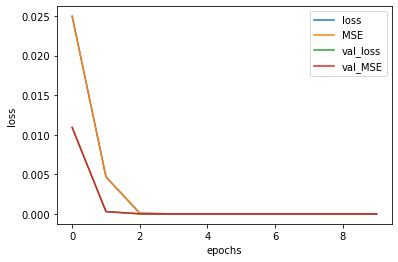

In [121]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [122]:
X_test_norm = X_scaler.transform(X_test)
y_test_norm = y_scaler.transform(y_test)

In [123]:
y_pred_norm = model.predict(X_test_norm)

In [124]:
y_pred = y_scaler.inverse_transform(y_pred_norm).squeeze()

In [125]:
tf.keras.metrics.mean_squared_error(y_test.squeeze(), y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0223532>

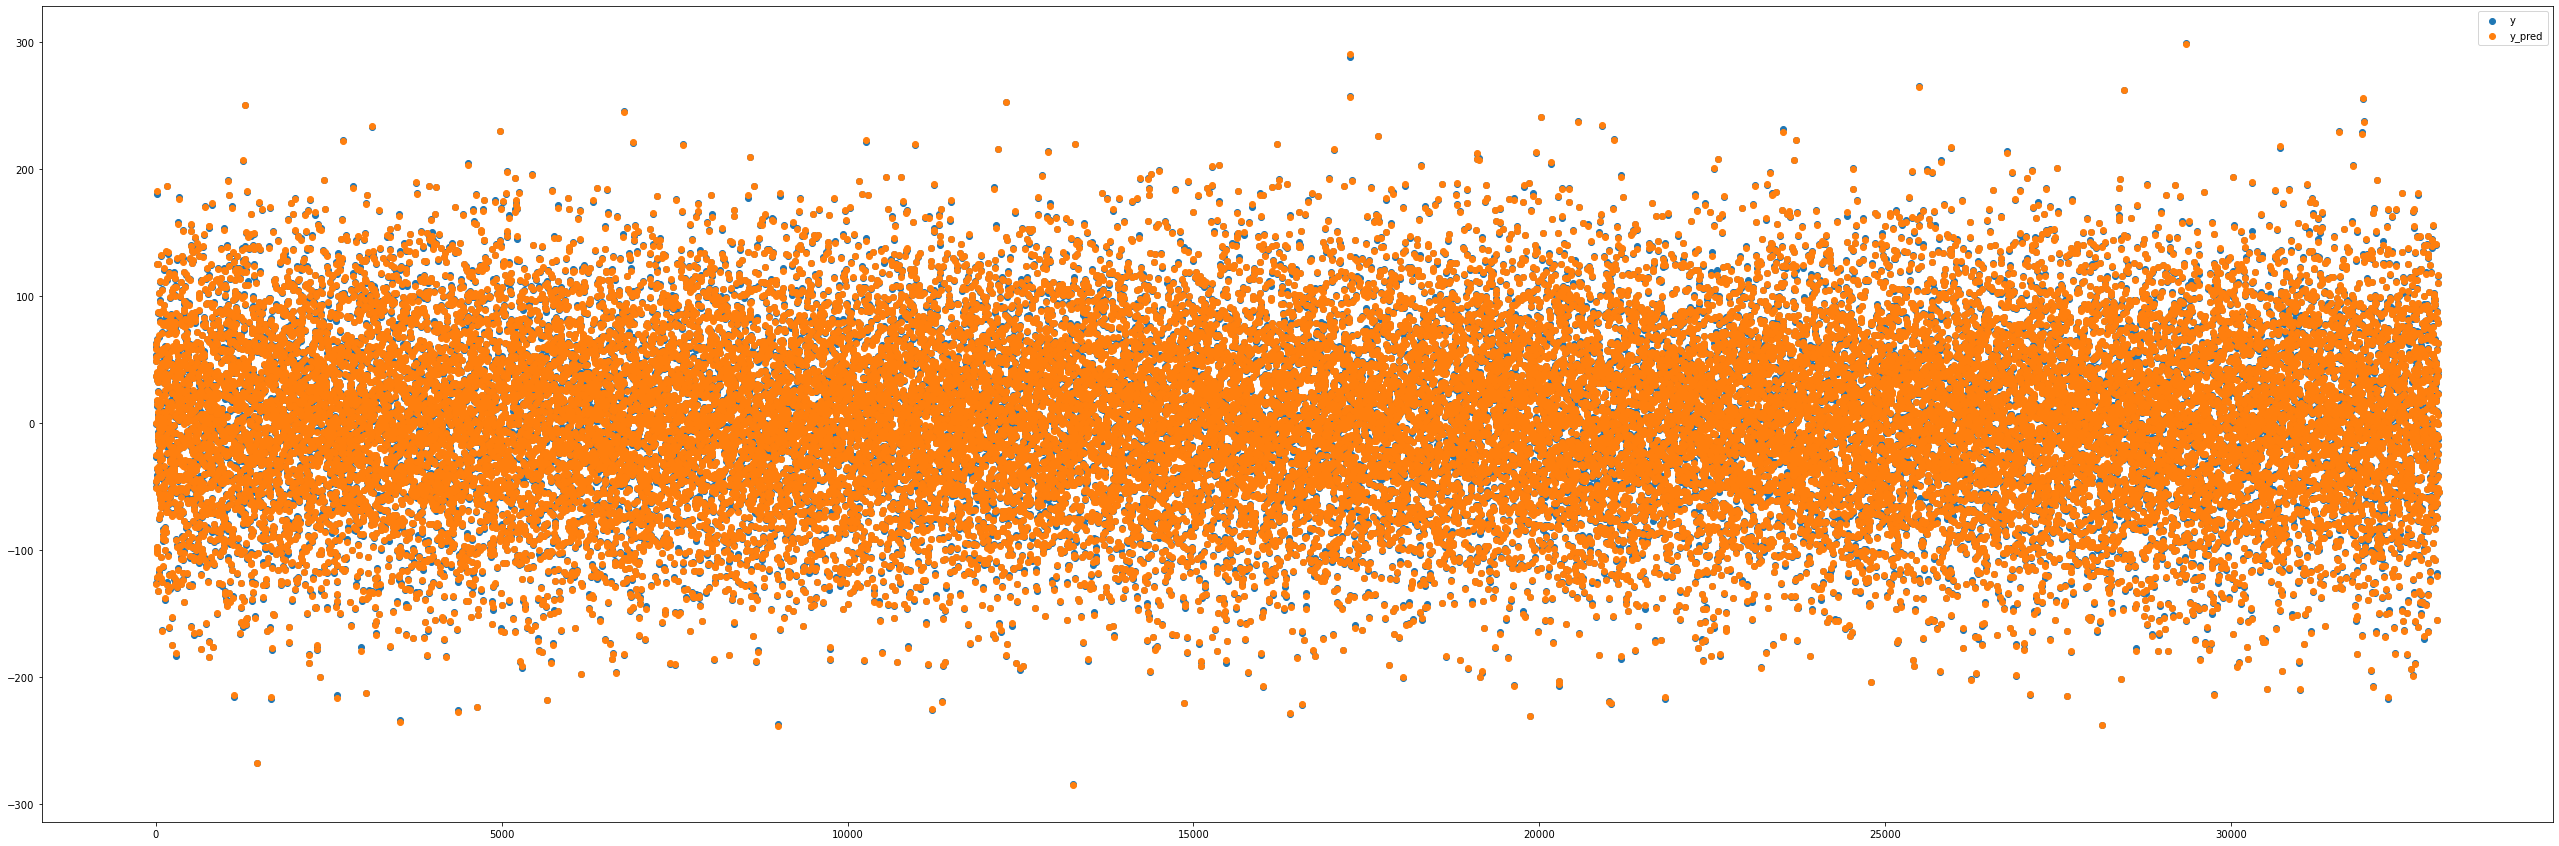

In [126]:
fig = plt.figure(figsize=(45, 15))

ax1 = fig.add_subplot(111)
ax1.scatter(range(y_test.size), y_test, label='y')
ax1.scatter(range(y_pred.size), y_pred, label='y_pred')
ax1.legend()

#### 5. Результати оформити у вигляді файлів: 

In [24]:
import pandas as pd

In [25]:
df = pd.DataFrame(X)
df = df.add_prefix('x_')

In [26]:
df['y'] = y

In [27]:
df.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,y
0,-1.281945,1.150160,0.668352,0.451798,1.086872,-1.669124,0.066746,1.980057,0.188797,-0.405220,-0.793942,-0.194390,-1.316785,-0.443777,-0.617069,0.400964,1.204022,-54.172520
1,0.756856,0.492796,0.097852,-0.868774,-1.090707,-1.884179,-0.263088,-0.627859,0.592877,-1.596132,-0.475349,-0.242926,-1.045868,-0.955263,0.282620,-0.409523,0.071806,-132.370735
2,0.924706,-1.952950,-1.580409,0.537616,2.646757,-0.605673,0.462254,-1.818717,3.149244,-0.604977,0.145607,0.013201,-0.131755,0.355076,-1.934267,-1.213557,-0.958991,-34.347275
3,-0.794167,-0.721986,0.359497,-0.249510,1.019451,-1.781083,-2.951203,-0.088449,0.095067,1.194554,-0.806103,-0.470169,0.376373,-0.713881,-0.259197,-0.608128,-0.875259,-88.050020
4,0.776311,0.048423,-0.357443,-0.944826,0.056779,0.146068,-0.415003,1.129970,0.123279,0.880800,-0.350198,0.177505,-0.606494,0.481315,0.786609,-0.195241,0.295431,16.458856


In [28]:
df.to_csv('make_regression_df.csv')

#### Висновок 

На даній лабораторній роботі мною було згенеровано дані для задачі ресгресії із використанням багатьох параметрів, які було згодом записано у .csv файл. Для цього я використав функцію make_regression бібліотеки sklearn. Для попередньої обробки та нормалізації данних я використав MinMaxScaler, а для побудови регресії - LinearRegression. Отримані коефіцієнти регресії було використано для перевірки точності моделі. Результат y_pred було візуалізовано зі справжніми данними. В ході прогнозування середньоквадратична помилка моделі склала 1.009 